# ADVERTISEMENT DATASET

We need to predict the total sales generated from all the sales channels

In [1]:
#Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data and reading it
mdf=pd.read_csv("6.Advertisement.csv")

In [3]:
#Veiwing the top and last 5 rows of data
mdf

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


We can see there all the columns are in numerical (continuous) float data type


There are 200 rows and 5 columns in the dataset

In [4]:
#Column names
mdf.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

first column is just the numbering ..not required, so we are dropping it 

In [5]:
#Storing into new dataset
df=mdf.drop('Unnamed: 0',axis=1)

In [6]:
#Columns in df and their descritions
df.columns=[i.lower() for i in df.columns] #Changing all column names into lower letters
df.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
#Checking data types
df.dtypes

tv           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All columns have data in float

tv           0
radio        0
newspaper    0
sales        0
dtype: int64

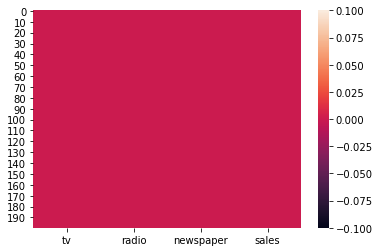

In [8]:
#Checking for missing values
sns.heatmap(df.isnull())
df.isnull().sum()

There are no missing values

In [9]:
#Brief description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


We can see complete details of dataset ,no null values, 200 rows, 4 columns , data type in each column 

In [10]:
#Let us see the statistical summary
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#Checking for skewness
df.skew()

tv          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skewness is in acceptable range , except in column newspaper

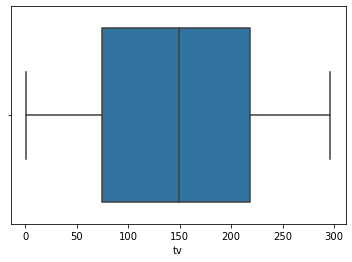

In [13]:
#Checking the outliers
sns.boxplot(df['tv'])

We can see no outliers in this column

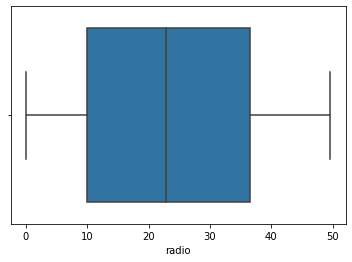

In [14]:
sns.boxplot(df['radio'])

We can see no outliers in this column

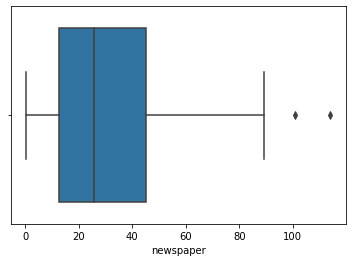

In [15]:
sns.boxplot(df['newspaper'])

We can see there areoutliers present in this column

In [16]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [17]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [18]:
df=df[(z<3).all(axis=1)]

In [19]:
df.shape

(198, 4)

New dataframe has 198 rows and 4 columns after removing outliers.
before there are 200 rows

In [20]:
#Percentage of data loss
(2/200)*100

1.0

only 1% of data is lost. 

In [21]:
#Checking skewness in that column 
df.skew()

tv          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness reduced from 0.89 to 0.65

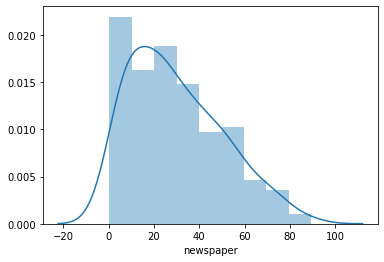

In [22]:
sns.distplot(df['newspaper'])

In [24]:
#Applying sqrt transformation to remove skewness
df['newspaper']=np.sqrt(df['newspaper'])
df['newspaper'].skew()

-0.040649472621842535

Now the skewness is reduced from 0.65 to -0.04

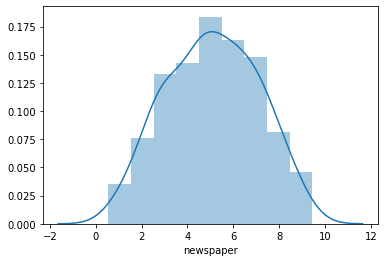

In [25]:
sns.distplot(df['newspaper'])

after removing the skewness, normally distributed with in acceptable range

Skewness:  -0.08233208466403653


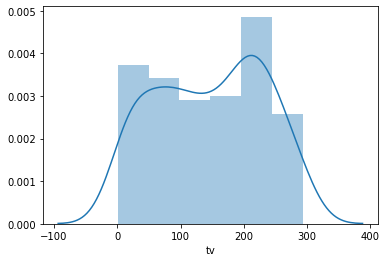

In [31]:
sns.distplot(df['tv'])
print('Skewness: ',df['tv'].skew())

acceptable skewness -0.1

skewness: 0.11484208726730326


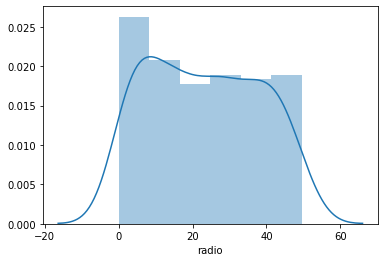

In [32]:
#Skewness in column radio
sns.distplot(df['radio'])
print("skewness:",df['radio'].skew())

acceptable skewness 0.1

Text(0, 0.5, 'Sales')

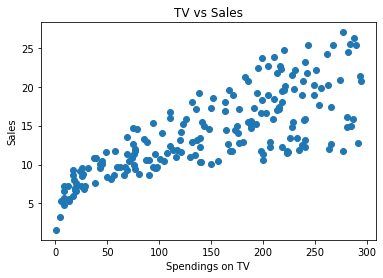

In [35]:
#let us see how each column is contributing to the sale
plt.scatter(x=df['tv'],y=df['sales'],)
plt.title("TV vs Sales")
plt.xlabel('Spendings on TV')
plt.ylabel('Sales')

We can see with increase in expenditure on tv adds... sales generated also increased

Text(0, 0.5, 'Sales')

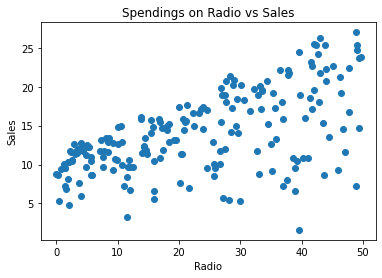

In [37]:
plt.scatter(x=df['radio'],y=df['sales'],)
plt.title("Spendings on Radio vs Sales")
plt.xlabel('Radio')
plt.ylabel('Sales')

There is no particular trend.. there is increase also

Text(0, 0.5, 'Sales')

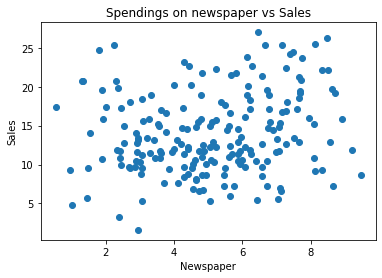

In [38]:
plt.scatter(x=df['newspaper'],y=df['sales'],)
plt.title("Spendings on newspaper vs Sales")
plt.xlabel('Newspaper')
plt.ylabel('Sales')

No relation b/w newspaper adds and sale generated... it is random

Text(0.5, 0, 'News Paper')

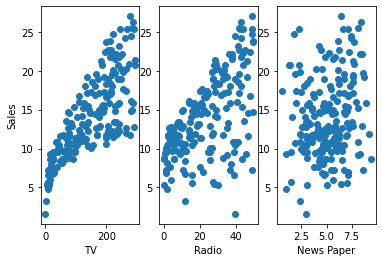

In [48]:
#Plotting all graphs vs sales
plt.subplot(1,3,1)
plt.scatter(df['tv'],df['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(df['radio'],df['sales'])
plt.xlabel('Radio')

plt.subplot(1,3,3)
plt.scatter(df['newspaper'],df['sales'])
plt.xlabel('News Paper')

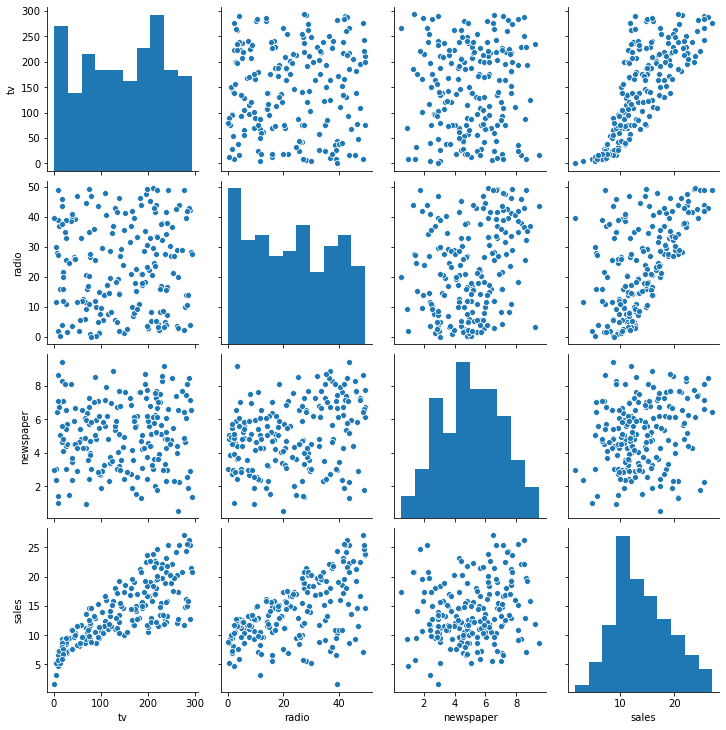

In [58]:
#Let us see comparision with each column
sns.pairplot(data=df)

There is no relation b/w spending for adds on any two columns and their effect on sales
sales increased with more spending on tv, moderate on radio and no relation with newspaper

In [59]:
#Let us see the correlation
df.corr()

,tv,radio,newspaper,sales
tv,1.000000,0.051978,0.039135,0.779121
radio,0.051978,1.000000,0.301750,0.576748
newspaper,0.039135,0.301750,1.000000,0.194153
sales,0.779121,0.576748,0.194153,1.000000


In [ ]:
We can see the correlation b/w each variable and their relation with sales

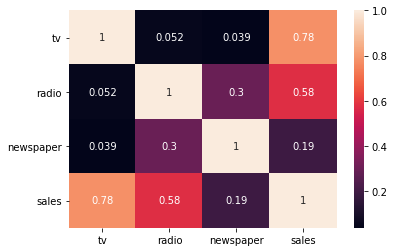

In [61]:
#Visualising the correlation
sns.heatmap(df.corr(),annot=True)

We can see that :
    Tv adds highly correlated to sales , other two doesn't have much correlation
    Radio and newspaper are equally correlated to each other - almost equal expenditures are spent on them
    Tv is negatively correlated to radio and newspaper , i.e with more investment on tv, less investment is done on other two

No need to remove any columns

We need to apply scaling on features since they have huge difference b/w minimun and max values. We use min-max scaling technique

In [63]:
df.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [67]:
#Splitted the features and target variable
x=df.iloc[:,:-1]
y=df['sales']

In [68]:
x.columns

Index(['tv', 'radio', 'newspaper'], dtype='object')

In [69]:
x.shape

(198, 3)

we can see that now only 3 columns in our features

In [71]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x=min_max.fit_transform(x)

Now we scaled the features

In [74]:
#Viewing values of x
x

array([[0.78320246, 0.76209677, 0.87240955],
       [0.14953909, 0.79233871, 0.69244748],
       [0.05633322, 0.92540323, 0.87308409],
       [0.51485149, 0.83266129, 0.79717752],
       [0.61488563, 0.21774194, 0.7964433 ],
       [0.02731308, 0.9858871 , 0.91075957],
       [0.19392284, 0.66129032, 0.48273801],
       [0.40798907, 0.39516129, 0.32087293],
       [0.02697166, 0.04233871, 0.05077527],
       [0.67975418, 0.05241935, 0.45541992],
       [0.2232844 , 0.11693548, 0.49078406],
       [0.73062479, 0.48387097, 0.16304104],
       [0.07886651, 0.70766129, 0.8498697 ],
       [0.33048822, 0.15322581, 0.23975017],
       [0.69443496, 0.66330645, 0.69993299],
       [0.66473199, 0.96169355, 0.75504522],
       [0.95834756, 0.7983871 , 0.77712803],
       [0.23386821, 0.41330645, 0.41876561],
       [0.50051212, 0.48185484, 0.42915073],
       [0.74325708, 0.55846774, 0.75889501],
       [0.80812564, 0.10282258, 0.48273801],
       [0.04267668, 0.32056452, 0.72916663],
       [0.

We can see that now all value are in range of 0 to 1

In [77]:
#Splitting the data for train and test with best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.model_selection import train_test_split
m_mse=0
m_r2=0
rs=0
score=0
lr=LinearRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    sc=lr.score(x_train,y_train)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    if mse>m_mse:
        m_mse=mse
        m_r2=r2
        rs=i
        score=sc
print(f"Score: {score}\n R2 score: {m_r2} \n Mean squared error: {m_mse} \n Random state: {rs}\n ")

    
    

Score: 0.9307424871921833
 R2 score: 0.7287463825749281 
 Mean squared error: 6.404329372825567 
 Random state: 447
 


In [ ]:
From this we can see that best random state is at 447

In [78]:
#Splitting data with best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=447)

In [79]:
#Importing different models to try
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [85]:
#List of models
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]
r2l=[]
msel=[]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    sc=m.score(x_train,y_train)
    r2=r2_score(y_test,predm)
    mse=mean_squared_error(y_test,predm)
    msel.append(mse)
    r2l.append(r2)
    print(f"Metrics for model {m}:\n Score: {sc}\n Mean squared error: {mse}\n R2 score: {r2}")
    print('\n')
    

Metrics for model LinearRegression():
 Score: 0.9307424871921833
 Mean squared error: 6.404329372825567
 R2 score: 0.7287463825749281


Metrics for model DecisionTreeRegressor():
 Score: 1.0
 Mean squared error: 1.1309999999999996
 R2 score: 0.9520968046069744


Metrics for model KNeighborsRegressor():
 Score: 0.9711034226025654
 Mean squared error: 3.0430560000000004
 R2 score: 0.8711121961450761


Metrics for model SVR():
 Score: 0.9457316050632485
 Mean squared error: 4.7188289754785595
 R2 score: 0.8001352905051987




Out of all the above , decisio tree is giving best score of 100% let's cross validate to find the best model

In [86]:
#Cross validtion
from sklearn.model_selection import cross_val_score
cvm=[]
for m in models:
    cvscore=cross_val_score(m,x,y,cv=20)
    print(f"CV Scores of model {m}")
    print('Mean score:',cvscore.mean())
    print('Std:',cvscore.std())
    print('\n')
    cvm.append(cvscore.mean())

CV Scores of model LinearRegression()
Mean score: 0.8685806465025865
Std: 0.09354400109840118


CV Scores of model DecisionTreeRegressor()
Mean score: 0.9342424791660685
Std: 0.051386431803493504


CV Scores of model KNeighborsRegressor()
Mean score: 0.9403739379280808
Std: 0.038619807220024206


CV Scores of model SVR()
Mean score: 0.9248212459647309
Std: 0.06541541572037282




In [90]:
#Data frame with results
df_m=pd.DataFrame({})
df_m['Model']=models
df_m['MSE']=msel
df_m['R2 Score']=r2l
df_m['CV Score']=cvm

In [88]:
df_m

,Model,MSE,R2 Score,CV Score
0,LinearRegression(),6.404329,0.728746,0.868581
1,DecisionTreeRegressor(),1.131000,0.952097,0.934242
2,KNeighborsRegressor(),3.043056,0.871112,0.940374
3,SVR(),4.718829,0.800135,0.924821


From above we can see Decision Tree has the less difference between R2 Score and CV Score

Decision Tree is our Best model 

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
#Hyper parameter tuning on the best model
from sklearn.model_selection import GridSearchCV

args={'criterion':['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],"splitter":['“best', 'random'],
     'max_depth':[1,10,100,1000,10000],'min_samples_split':[1,2,3,5,10,20,50,100,500],'min_weight_fraction_leaf':[0,0.1,0.01,0.001,0.0001],
     'random_state':[447]}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid=args,cv=20)
grid.fit(x_train,y_train)
print('Best score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best parameter:',grid.best_params_)


Best score: 0.9517804187044124
Best Estimator: DecisionTreeRegressor(max_depth=100, min_samples_split=3,
                      min_weight_fraction_leaf=0, random_state=447,
                      splitter='random')
Best parameter: {'criterion': 'squared_error', 'max_depth': 100, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0, 'random_state': 447, 'splitter': 'random'}


In [115]:
#We found the best parameters for the model
dtc=DecisionTreeRegressor(criterion= 'squared_error',max_depth= 100,min_samples_split= 3, 
                          min_weight_fraction_leaf= 0, random_state= 447, splitter= 'random')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Score:',dtc.score(x_train,y_train))
print("MSE:",mean_squared_error(y_test,pred))
print("R2 score:",r2_score(y_test,pred))

Score: 0.9971322604410533
MSE: 1.0451500000000002
R2 score: 0.9557329578558614


We can see now the model accuracy is 100%
with least MSE and r2 nearer to 1.

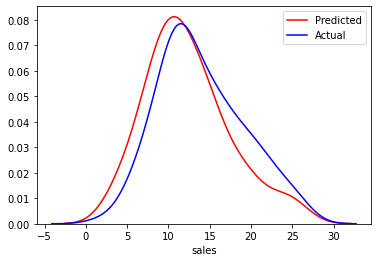

In [121]:
ax1=sns.distplot(pred,hist=False,color='r',label='Predicted')
sns.distplot(df['sales'],hist=False,color='b',label='Actual',ax=ax1)


We can see graphically , the model is almost right, predicted and actual values are same 95%

In [125]:
metric=pd.DataFrame({})
metric['Actual']=y_test
metric['Predicted']=pred

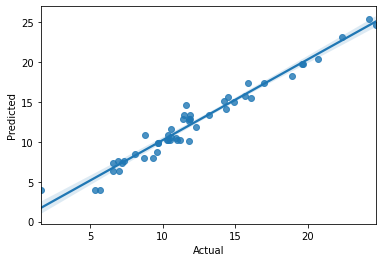

In [126]:
#Visualising using other graphs
sns.regplot(x="Actual", y="Predicted", data=metric)

Therefore we successfully created a model with 95% accuracy of predicting the sales generated by spending amount on different sources of advertisement

In [101]:
#Saving the model
import joblib
joblib.dump(dtc,"6.Sales_Prediction.obj")

['6.Sales_Prediction.obj']